<a href="https://colab.research.google.com/github/Mukundm98/Water-Potability/blob/main/Drinking_water_quality_potability_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.freeimages.com%2Fsearch%2Fdrinking-water&psig=AOvVaw3SWzNm79OkYNqwgP4oVJO6&ust=1664351797434000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCPjn5uW_tPoCFQAAAAAdAAAAABAO)

##Problem statement: 
- Design a predictive model with the use of machine learning algorithms to predict whether quality of water good or not.

##Basic Information about dataset


*   ppm: parts per million
*   μg/L: microgram per litre
*   mg/L: milligram per litre




**Column description:**

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0



##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # loading the dadasets available 
 !ls "/content/drive/MyDrive/Water quality project/"
 filepath = "/content/drive/MyDrive/Water quality project/"

'Attribute info.gdoc'  'Water Quality .gsheet'
 Water_Quality.csv     'Water_Quality_ph computed with median.gsheet'


In [ ]:
#Load CSV
water = pd.read_csv(filepath + 'Water_Quality.csv')

In [ ]:
#To understand the dataset
#To look at the dimensions, number of rows and columns
water.shape

(3276, 10)

In [ ]:
#To look at the names of the columns
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# data information
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#To look at the head 10 rows
water.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8905,20791.32,7.300212,368.5164,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.4229,18630.06,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.2363,19909.54,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.3734,22018.42,8.059332,356.8861,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.1015,17978.99,6.546600,310.1357,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.3133,28748.69,7.544869,326.6784,280.467916,8.399735,54.917862,2.559708,0
6,10.223860,248.0717,28749.72,7.513408,393.6634,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.3615,13672.09,4.563009,303.3098,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.9886,14285.58,7.804174,268.6469,389.375566,12.706049,53.928846,3.595017,0
9,11.180280,227.2315,25484.51,9.077200,404.0416,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
#To look at the last 5 records
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.6817,47580.99,7.166639,359.9486,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.5532,17329.80,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.7626,33155.58,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.6038,11983.87,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.1023,17404.18,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


The info command shows that there are **3276** rows. It also indicates the column names and their data type. 
The columns "**ph**" with 2785, "**Sulfate**" with 2495 and 3114 for "**Trihalomethanes**" records indicating the presence of "na" values

In [ ]:
# checking for null values
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# To check the percentage of missing values
water.isna().mean() * 100
#water.isnull().sum() * 100 / len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Missing value percentage


*   pH ~ 15%
*   Sulfate ~ 24%

*   Trihalomethanes ~ 5%







 





In [ ]:
#To find value counts
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
#To convert into categorical variables
water['Potability'] = pd.Categorical(water['Potability'])

In [ ]:
# To recheck using the info function if the categorical variables have been converted
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


#EDA

In [ ]:
# columns
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# To describe the dataset
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080794,196.369496,22014.092441,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594319,32.879761,8768.570813,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942600,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850550,15666.687500,6.127421,307.699500,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967650,20927.830000,7.130299,333.073500,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667450,27332.760000,8.114887,359.950200,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.200000,13.127000,481.030600,753.342620,28.300000,124.000000,6.739000


In [ ]:
# cloning dataframe
water2=water

#Vizualization

In [ ]:
# importing required libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import plotly.express as px
%matplotlib inline

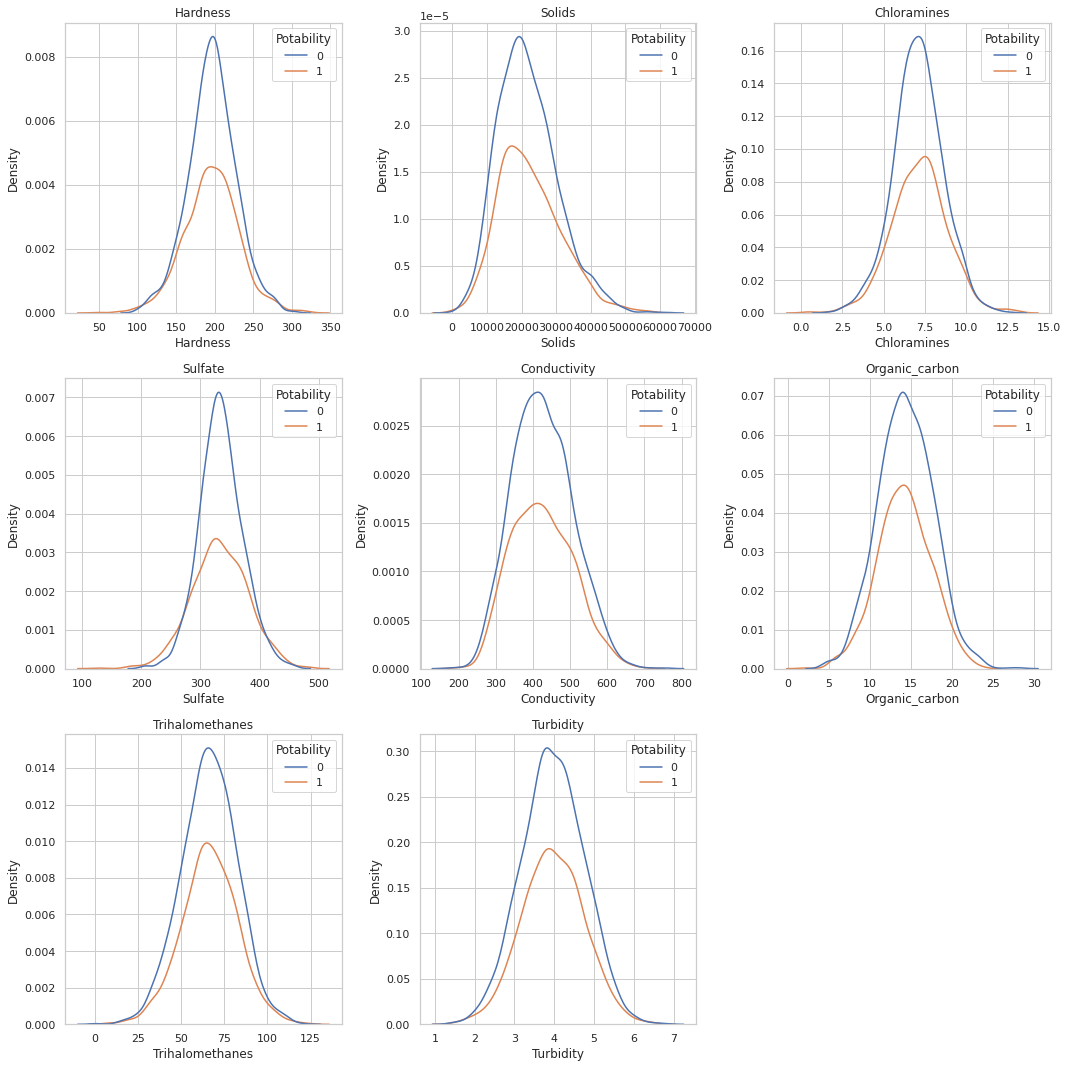

In [ ]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('Hardness')
sns.kdeplot(x=water2['Hardness'],hue = water2['Potability'])

plt.subplot(3,3,2)
plt.title('Solids')
sns.kdeplot(x=water2['Solids'],hue = water2['Potability'])
plt.subplot(3,3,3)
plt.title('Chloramines')
sns.kdeplot(x=water2['Chloramines'],hue = water2['Potability'])

plt.subplot(3,3,4)
plt.title('Sulfate')
sns.kdeplot(x=water2['Sulfate'],hue = water2['Potability'])

plt.subplot(3,3,5)
plt.title('Conductivity')
sns.kdeplot(x=water2['Conductivity'],hue = water2['Potability'])
plt.subplot(3,3,6)
plt.title('Organic_carbon')
sns.kdeplot(x=water2['Organic_carbon'],hue = water2['Potability'])

plt.subplot(3,3,7.5)
plt.title('Trihalomethanes')
sns.kdeplot(x=water2['Trihalomethanes'],hue = water2['Potability'])

plt.subplot(3,3,8.5)
plt.title('Turbidity')
sns.kdeplot(x=water2['Turbidity'],hue = water2['Potability'])

plt.tight_layout()

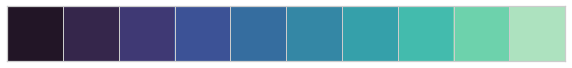

In [ ]:
colors= sns.color_palette("mako", 10)
sns.palplot(colors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


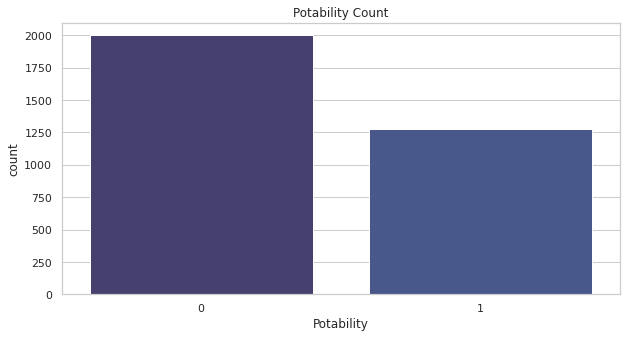

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Potability Count')
sns.set_style('dark')
sns.countplot(water2['Potability'], palette=colors[2:8])

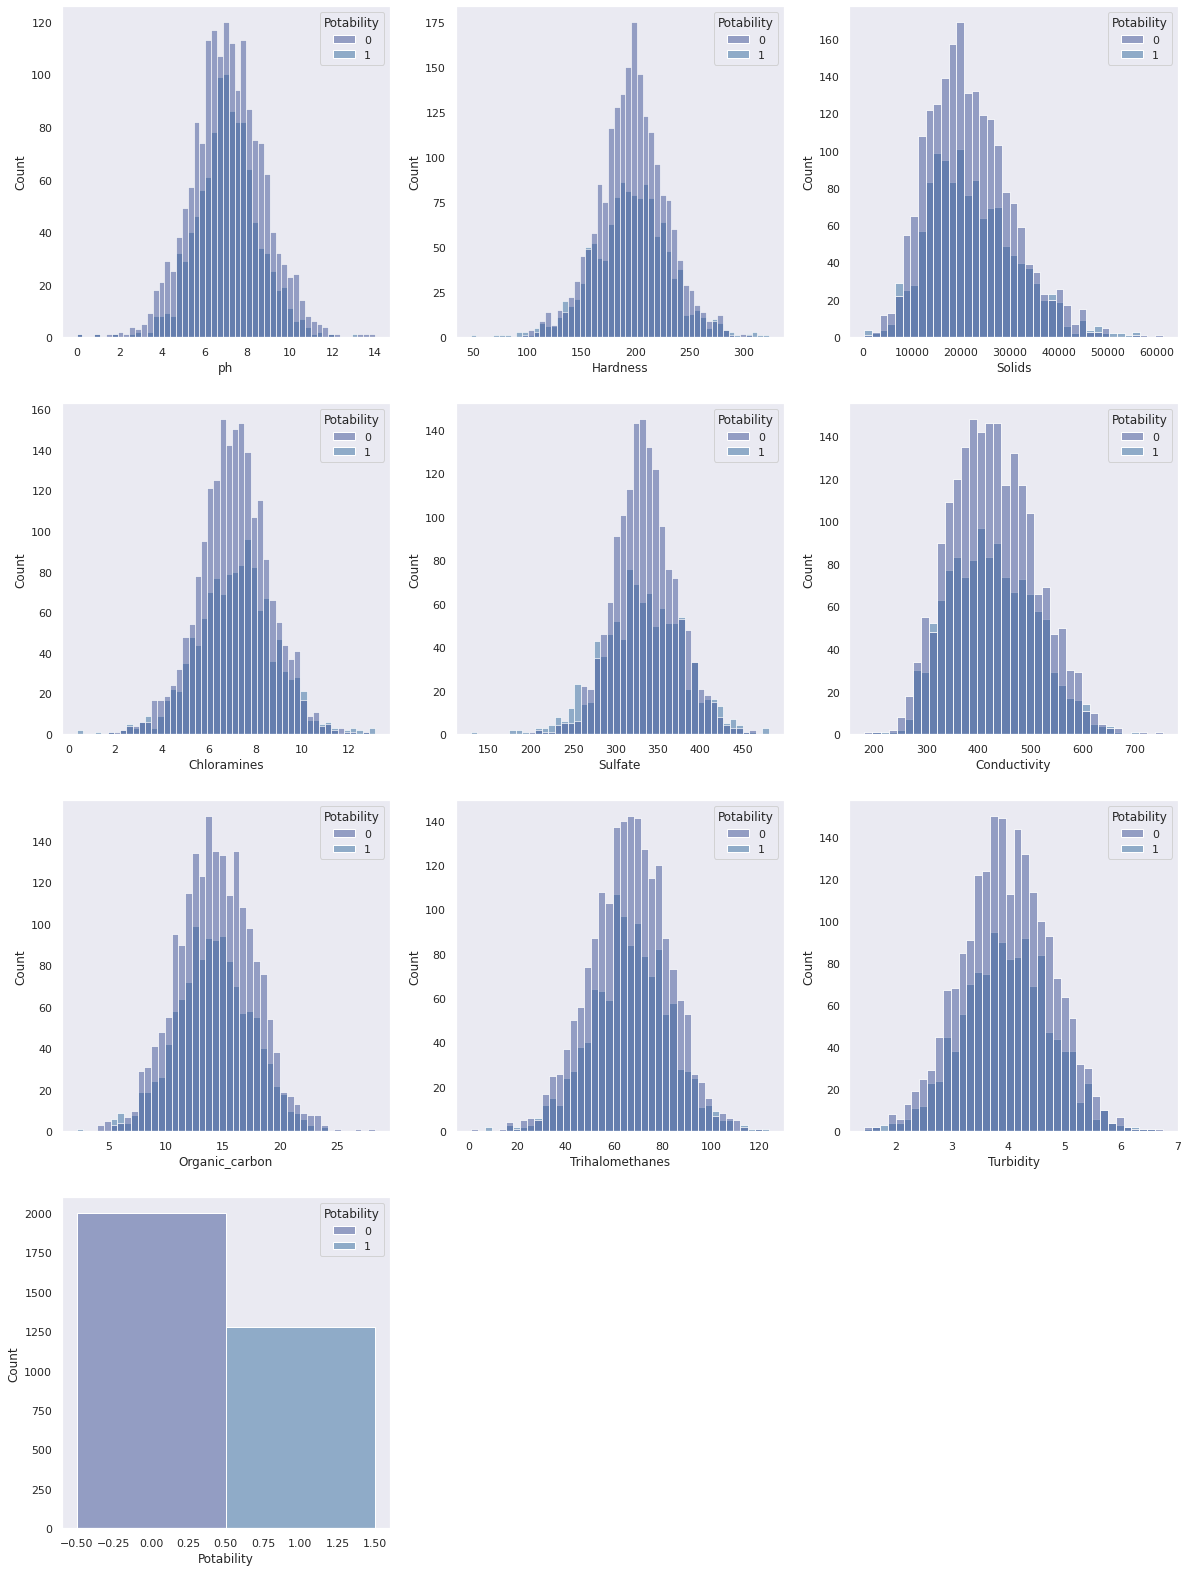

In [ ]:
plt.figure(figsize=(20,28))
sns.set_style('dark')
i = 1
for col in water2.columns:
    plt.subplot(4, 3, i)
    sns.histplot(data = water, x = water2[col], hue ='Potability', palette=colors[3:5])
    i+=1

#PHASE -1 

#Treating Missing Value

At first as there were minor outliers present in the dataset, so I imputed missing values using median but the accuracy was very low so in the 2nd step I have tried imputing the missing values with mean since the outliers are equally distributed in the dataset 

In [ ]:
water2['ph'].fillna(water2['ph'].mean(), inplace=True)
water2['Sulfate'].fillna(water2['Sulfate'].mean(), inplace=True)
water2['Trihalomethanes'].fillna(water2['Trihalomethanes'].mean(), inplace=True)
#water2['Sulfate'].fillna(water2['Sulfate'].median(), inplace=True)
#water2['Trihalomethanes'].fillna(water2['Trihalomethanes'].median(), inplace=True)

In [ ]:
water2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

We have successfully treated missing values now we will treat outliers

#Treating outliers

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Hardness"
#print(water2['Hardness'].quantile(0.05)) 
#print(water2['Hardness'].quantile(0.95)) 

141.76325
249.6098


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 249.6098
#water2['Hardness'] = np.where(water2['Hardness'] > 249.6098, 249.6098, water2['Hardness'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 180
#water2['Hardness'] = np.where(water2['Hardness'] < 141.76, 141.76, water2['Hardness'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Solids"
#print(water2['Solids'].quantile(0.05)) 
#print(water2['Solids'].quantile(0.95)) 

9545.8125
38474.9875


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 38474.98
#water2['Solids'] = np.where(water2['Solids'] > 38474.98, 38474.98, water2['Solids'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 9545.81
#water2['Solids'] = np.where(water2['Solids'] < 9545.81, 9545.81, water2['Solids'])


In [ ]:
# To calculate the 5th and 95th quantile value of the column "Chloramines"
#print(water2['Chloramines'].quantile(0.05)) 
#print(water2['Chloramines'].quantile(0.95)) 

4.5030537105
9.753100545999999


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 9.75
#water2['Chloramines'] = np.where(water2['Chloramines'] > 9.75, 9.75, water2['Chloramines'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 4.50
#water2['Chloramines'] = np.where(water2['Chloramines'] < 4.50, 4.50, water2['Chloramines'])


In [ ]:
# To calculate the 5th and 95th quantile value of the column "Sulfate"
#print(water2['Sulfate'].quantile(0.05)) 
#print(water2['Sulfate'].quantile(0.95)) 

274.607925
395.554125


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 395.55
#water2['Sulfate'] = np.where(water2['Sulfate'] > 395.55, 395.55, water2['Sulfate'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 274.60
#water2['Sulfate'] = np.where(water2['Sulfate'] < 274.60, 274.60, water2['Sulfate'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Conductivity"
#print(water2['Conductivity'].quantile(0.05)) 
#print(water2['Conductivity'].quantile(0.95)) 

300.1094657
566.34931985


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 566.34
#water2['Conductivity'] = np.where(water2['Conductivity'] > 566.34, 566.34, water2['Conductivity'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 300.11
#water2['Conductivity'] = np.where(water2['Conductivity'] < 300.11, 300.11, water2['Conductivity'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Organic_carbon"
#print(water2['Organic_carbon'].quantile(0.05)) 
#print(water2['Organic_carbon'].quantile(0.95)) 

8.81536170225
19.637254445


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 19.64
#water2['Organic_carbon'] = np.where(water2['Organic_carbon'] > 19.64, 19.64, water2['Organic_carbon'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 8.81
#water2['Organic_carbon'] = np.where(water2['Organic_carbon'] < 8.81, 8.81, water2['Organic_carbon'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Trihalomethanes"
#print(water2['Trihalomethanes'].quantile(0.05)) 
#print(water2['Trihalomethanes'].quantile(0.95))

39.9062353875
91.7445945325


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 91.74
#water2['Trihalomethanes'] = np.where(water2['Trihalomethanes'] > 91.74, 91.74, water2['Trihalomethanes'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 39.91
#water2['Trihalomethanes'] = np.where(water2['Trihalomethanes'] < 39.91, 39.91, water2['Trihalomethanes'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Turbidity"
#print(water2['Turbidity'].quantile(0.05)) 
#print(water2['Turbidity'].quantile(0.95)) 

2.684279234
5.22092452525


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 5.2
#water2['Turbidity'] = np.where(water2['Turbidity'] > 5.2, 5.2, water2['Turbidity'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 2.68
#water2['Turbidity'] = np.where(water2['Turbidity'] < 2.68, 2.68, water2['Turbidity'])

TypeError: ignored

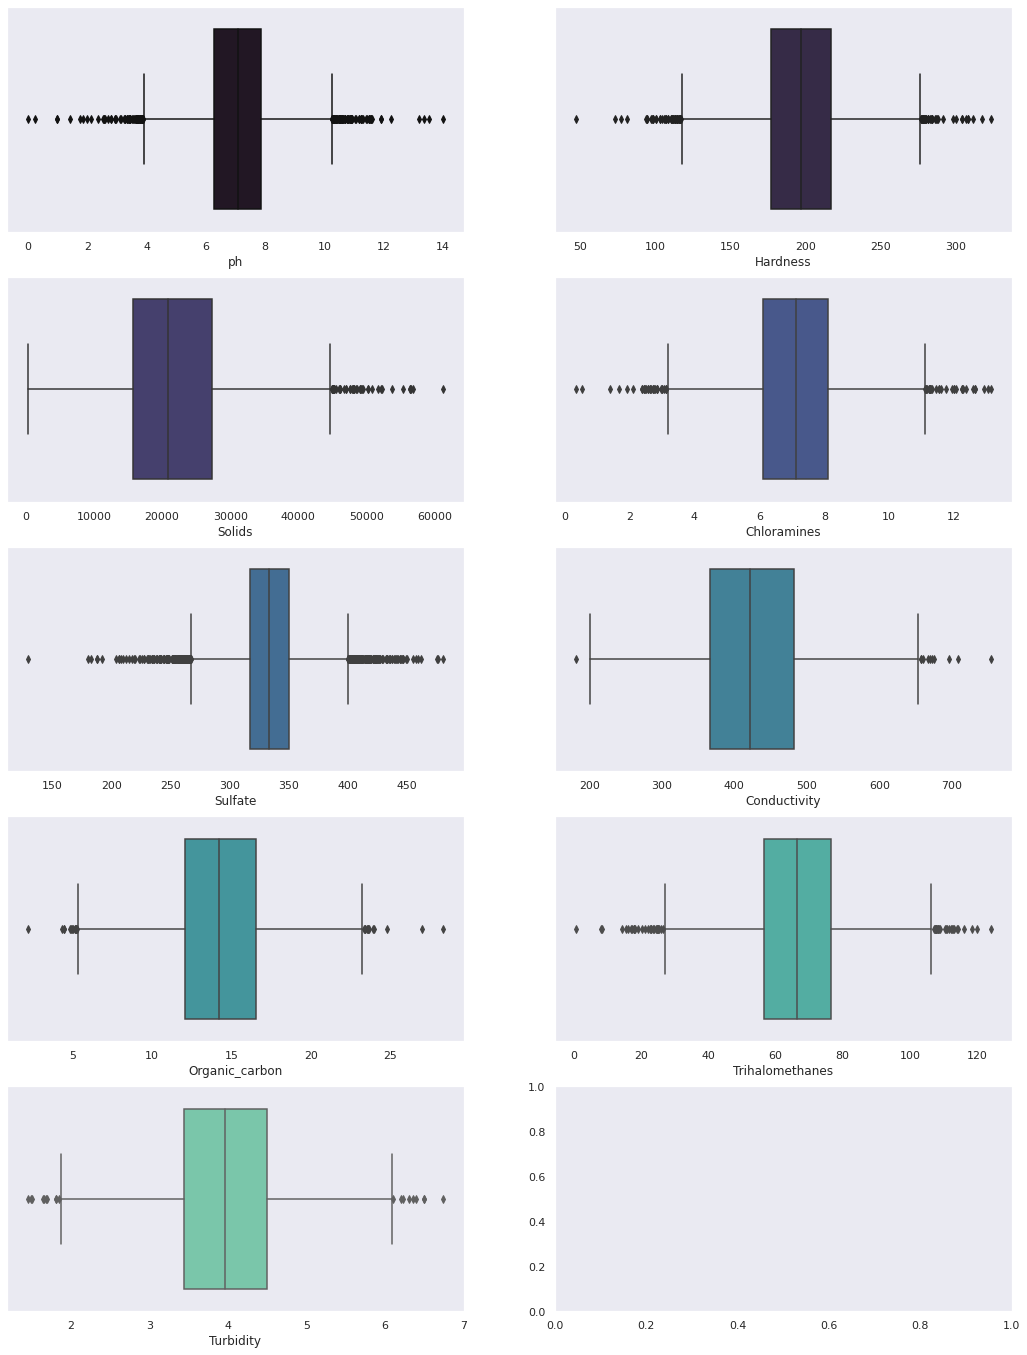

In [ ]:
plt.figure(figsize=(18,24))
sns.set_style('dark')
i = 1
for col in water2.columns:
    plt.subplot(5, 2, i)
    sns.boxplot(x=water2[col], palette=colors[i-1:i])
    i+=1

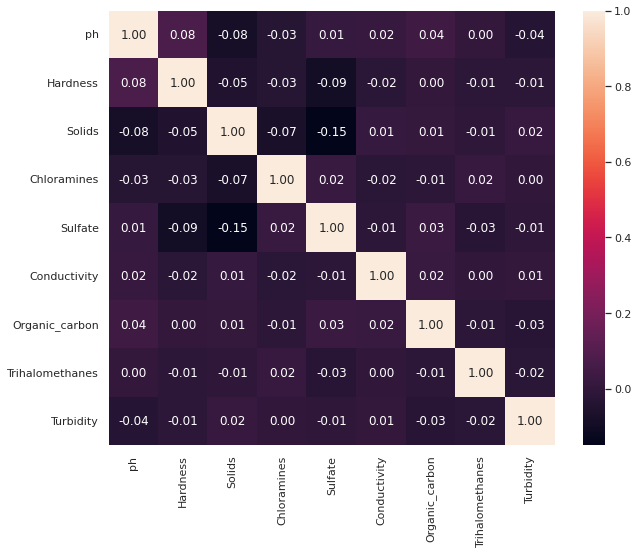

In [ ]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(water2.corr(),annot=True,fmt='.2f')
plt.show()

#Scaling (Min-max)

In [ ]:
# Import packages
from sklearn import preprocessing
# To scale the data 
min_max_scaler = preprocessing.MinMaxScaler()
water2[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity","Organic_carbon", "Trihalomethanes", "Turbidity", "Potability" ]] = min_max_scaler.fit_transform(water2[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity","Organic_carbon", "Trihalomethanes", "Turbidity", "Potability"]])

NameError: ignored

#Splitting of Train and Test Data

In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
X=water2.drop('Potability',axis=1)
y=water2['Potability']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2620, 9) (656, 9) (2620,) (656,)


2620 examples were allocated to the training set and 656 examples were allocated to the test set, as we specified.

In [ ]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,0.473115,0.564391,0.276595,0.445996,0.519064,0.400028,0.525460,0.521517,0.277021
831,0.477479,0.531060,0.555546,0.745564,0.612263,0.553599,0.253592,0.534807,0.487930
2658,0.488290,0.573958,0.295542,0.497914,0.479609,0.547339,0.444786,0.567703,0.662225
2495,0.505771,0.493510,0.202853,0.737832,0.542199,0.526286,0.425660,0.374125,0.338518
2603,0.457628,0.491320,0.287821,0.556615,0.578037,0.379982,0.578606,0.513802,0.590654


In [ ]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,0.505771,0.493627,0.330677,0.546475,0.579835,0.305819,0.688852,0.537732,0.649770
2782,0.474511,0.513187,0.534475,0.504071,0.581906,0.271182,0.479188,0.544424,0.588428
1644,0.560433,0.640667,0.376696,0.436037,0.486897,0.361081,0.429377,0.343473,0.196250
70,0.511462,0.492061,0.105447,0.270140,0.422120,0.431142,0.291173,0.724452,0.460369
2045,0.472525,0.478101,0.428066,0.701148,0.581699,0.550625,0.405617,0.628940,0.567866


In [ ]:
y_train.head()

233     0.0
831     0.0
2658    0.0
2495    0.0
2603    0.0
Name: Potability, dtype: float64

In [ ]:
y_test.head()

2947    0.0
2782    1.0
1644    0.0
70      0.0
2045    1.0
Name: Potability, dtype: float64

#Modelling

In [ ]:
#Importing Libraries for Analysis
import numpy as np
import pandas as pd
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Importing Libraries for Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
#Importing Libraries for Model Selection
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Trees':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVM Classifier':SVC(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting Classifier':GradientBoostingClassifier(),
    'Bagging Classifier':BaggingClassifier()
}

In [ ]:
#Training Different Models
for name, model in models.items():
    model.fit(X_train,y_train)
    print(f'{name} trained')

Logistic Regression trained
Decision Trees trained
Random Forest trained
SVM Classifier trained
AdaBoost trained
GradientBoosting Classifier trained
Bagging Classifier trained


#Evaluating the Models

In [ ]:
results={}
for name,model in models.items():
    result=np.mean(cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10))
    results[name]=result

In [ ]:
for name,score in results.items():
    print(f"{name} : {round(score,3)}")

Logistic Regression : 0.605
Decision Trees : 0.592
Random Forest : 0.663
SVM Classifier : 0.66
AdaBoost : 0.603
GradientBoosting Classifier : 0.646
Bagging Classifier : 0.634


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'} 0.6053435114503817
The Accuracy of Logistic Regression is :0.6280487804878049
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 

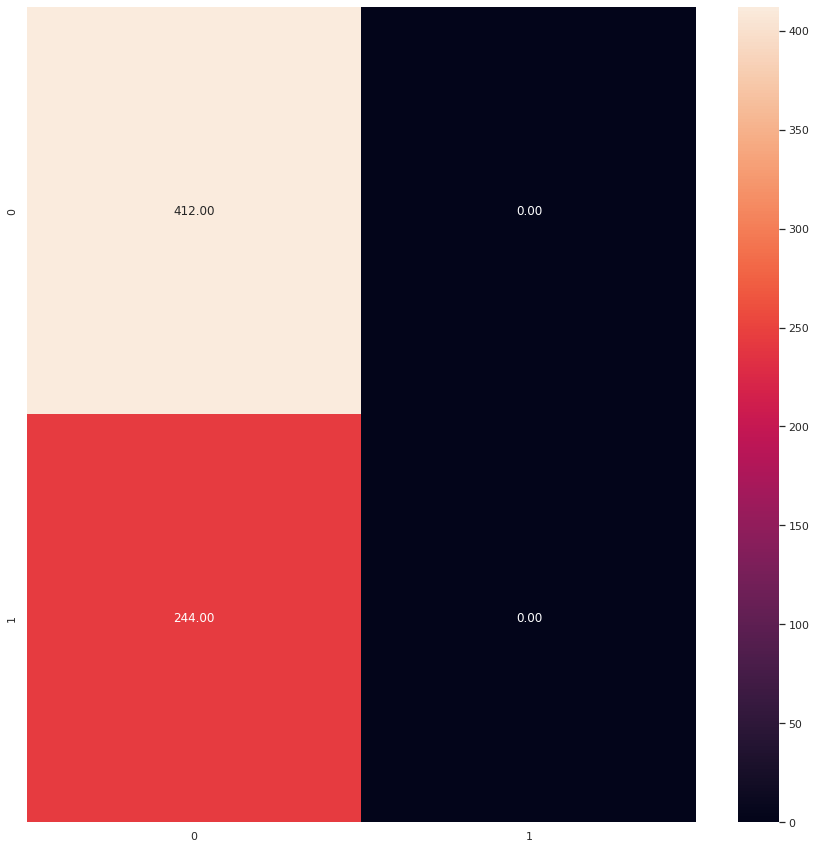

In [ ]:
#Applying Logistic Regression using GridSearchCV
param_grid={
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.1,0.5,1,2,3,4,5,10,100],
    'max_iter':[100,200,300,500,1000]      
           }
grid_lr=GridSearchCV(LogisticRegression(),param_grid,scoring='accuracy',cv=10)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_,grid_lr.best_score_)
y_pred_lr=grid_lr.predict(X_test)
print('The Accuracy of Logistic Regression is :{}'.format(accuracy_score(y_test,y_pred_lr)))
print(classification_report(y_test,y_pred_lr))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='.2f')

In [ ]:
print(grid_lr.best_params_,
grid_lr.best_score_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'} 0.6053435114503817


In [ ]:
#Applying Decision Tree using GridSearchCV

param_grid={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,5,6,7,8,9,10,20,50,'None']
}
grid_DT=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,scoring='accuracy')
grid_DT.fit(X_train,y_train)
print(grid_DT.best_params_,grid_DT.best_score_)

{'criterion': 'entropy', 'max_depth': 9} 0.6377862595419848


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 305, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

------------

The Accuracy of Decision Tree is :0.6371951219512195
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.74       412
         1.0       0.52      0.36      0.42       244

    accuracy                           0.64       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.62      0.64      0.62       656



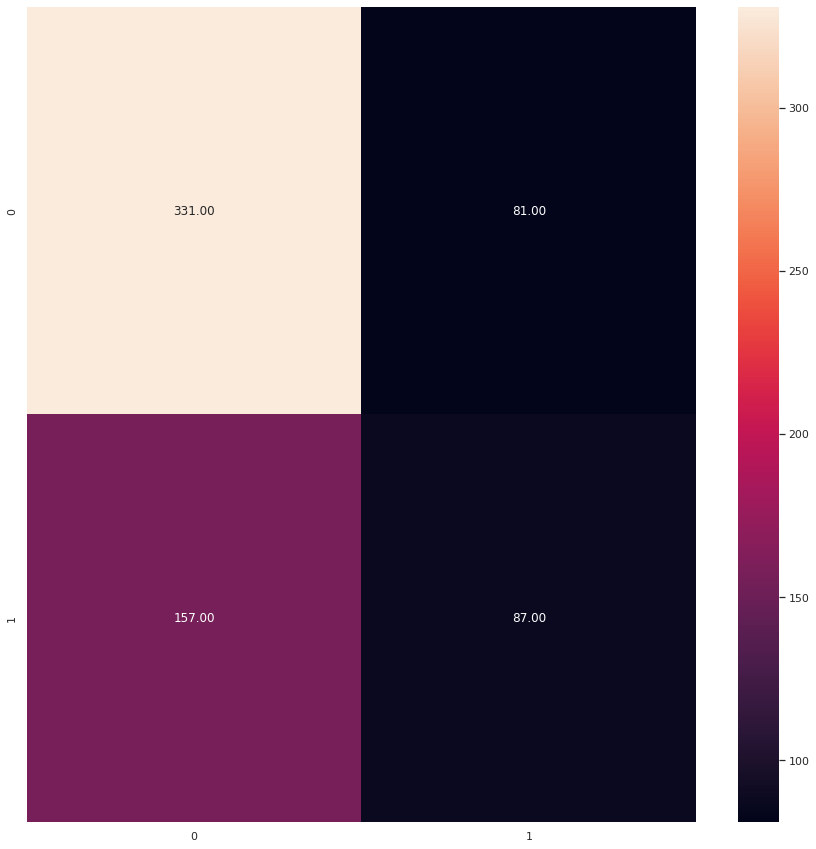

In [ ]:
y_pred_DT=grid_DT.predict(X_test)
print('The Accuracy of Decision Tree is :{}'.format(accuracy_score(y_test,y_pred_DT)))
print(classification_report(y_test,y_pred_DT))
sns.heatmap(confusion_matrix(y_test,y_pred_DT),annot=True,fmt='.2f')

In [ ]:
#Applying Random Forest using GridSearchCV
param_grid={
    'n_estimators':[50,100,200,300],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[5,6,7,8,9,10,20,50,100],
    'oob_score':['True']
}
grid_RF=GridSearchCV(RandomForestClassifier(),param_grid,cv=10,scoring='accuracy')
grid_RF.fit(X_train,y_train)
print(grid_RF.best_params_,grid_RF.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200, 'oob_score': 'True'} 0.6801526717557251


The Accuracy of the Random Forest is :0.6844512195121951
              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       412
         1.0       0.64      0.34      0.45       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.66       656



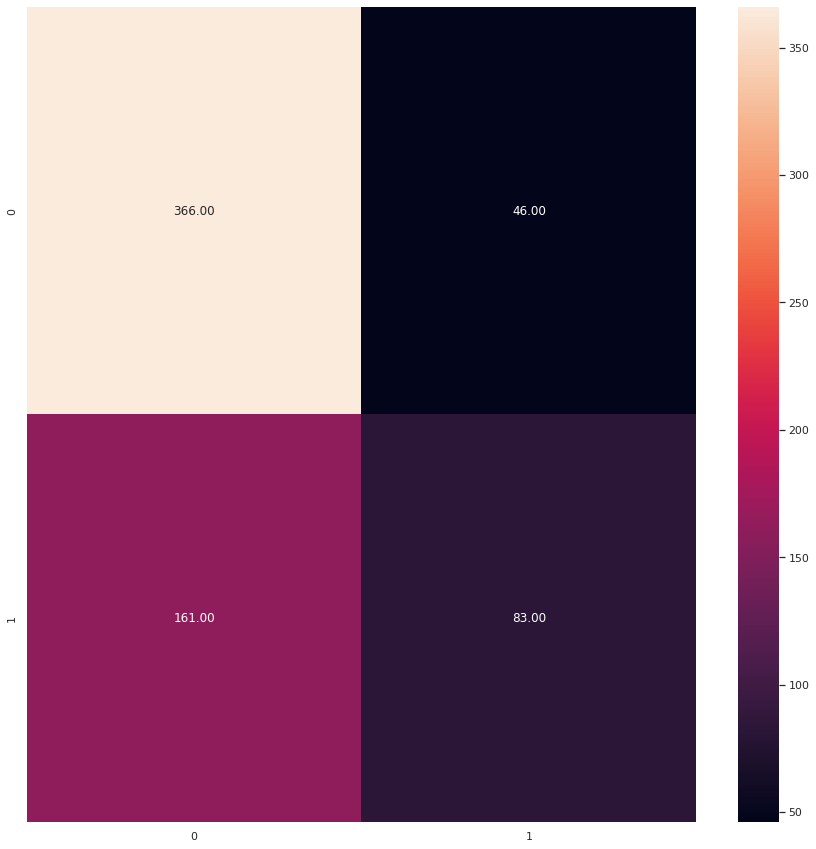

In [ ]:
y_pred_RF=grid_RF.predict(X_test)
print('The Accuracy of the Random Forest is :{}'.format(accuracy_score(y_test,y_pred_RF)))
print(classification_report(y_test,y_pred_RF))
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True,fmt='.2f')

In [ ]:
#Applying SVM Classifier using GridSearchCV
param_grid={
    'C':[0.1,0.5,1,2,3,4,5],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[3,4,5,6,7]
    
}
grid_SVC=GridSearchCV(SVC(),param_grid,cv=10,scoring='accuracy')
grid_SVC.fit(X_train,y_train)
print(grid_SVC.best_params_,grid_SVC.best_score_)

In [ ]:
y_pred_SVC=grid_SVC.predict(X_test)
print('The Accuracy of SVC is :{}'.format(accuracy_score(y_test,y_pred_SVC)))
print(classification_report(y_test,y_pred_SVC))
sns.heatmap(confusion_matrix(y_test,y_pred_SVC),annot=True,fmt='.2f')

In [ ]:
#Applying AdaBoostClassifier using GridSearchCV
param_grid={
    'n_estimators':[10,20,30,50,100,200,300],
    'learning_rate':[0.1,0.5,1,2,3,4,5,10]
}
grid_AB=GridSearchCV(AdaBoostClassifier(),param_grid,cv=10,scoring='accuracy')
grid_AB.fit(X_train,y_train)
print(grid_AB.best_params_,grid_AB.best_score_)

In [ ]:
y_pred_AB=grid_AB.predict(X_test)
print('The Accuracy of AdaBoost is :{}'.format(accuracy_score(y_test,y_pred_AB)))
print(classification_report(y_test,y_pred_AB))
sns.heatmap(confusion_matrix(y_test,y_pred_AB),annot=True,fmt='.2f')

In [ ]:
#Applying GradientBoostingClassifier using GridSearchCV
param_grid={
    'n_estimators':[50,100,200,300],
    'learning_rate':[0.1,0.5,1,2,3,4,5]
}
grid_GDC=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10,scoring='accuracy')
grid_GDC.fit(X_train,y_train)
print(grid_GDC.best_params_,grid_GDC.best_score_)

In [ ]:
y_pred_GDC=grid_GDC.predict(X_test)
print('The Accuracy of GradientBoostingClassifier is :{}'.format(accuracy_score(y_test,y_pred_GDC)))
print(classification_report(y_test,y_pred_GDC))
sns.heatmap(confusion_matrix(y_test,y_pred_GDC),annot=True,fmt='.2f')

In [ ]:
#Applying Bagging Classifier using GridSearchCV
param_grid={
    'n_estimators':[10,20,30,50,100]
}
grid_BC=GridSearchCV(BaggingClassifier(),param_grid,cv=10,scoring='accuracy')
grid_BC.fit(X_train,y_train)
print(grid_BC.best_params_,grid_BC.best_score_)

In [ ]:
print(grid_BC.best_params_,grid_BC.best_score_)

In [ ]:
y_pred_BC=grid_BC.predict(X_test)
print('The Accuracy of BoostingClassifier is :{}'.format(accuracy_score(y_test,y_pred_BC)))
print(classification_report(y_test,y_pred_BC))
sns.heatmap(confusion_matrix(y_test,y_pred_BC),annot=True,fmt='.2f')

#Conclusion